In [4]:
%matplotlib inline
import tweepy
import spacy
from spacy import displacy
import pandas as pd

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Load the spaCy model
nlp = spacy.load("en")


In [6]:
tweet_dict = {
    "text": [],
    "label": []
}

In [8]:
user_tweets = api.user_timeline("PaulONeillYES")

In [10]:
for tweet in user_tweets:
    doc = nlp(tweet["text"])
    
    if not doc.ents:
        print("No entities to visualize")
        print("------------------------")
    else:
        for ent in doc.ents:
            tweet_dict["text"].append(ent.text)
            tweet_dict["label"].append(ent.label_)
            
        spacy.displacy.render(doc, style="ent", jupyter=True)
        print("------------------------")
        

No entities to visualize
------------------------
No entities to visualize
------------------------


------------------------


------------------------
No entities to visualize
------------------------
No entities to visualize
------------------------


------------------------
No entities to visualize
------------------------


------------------------


------------------------


------------------------


------------------------


------------------------


------------------------


------------------------


------------------------
No entities to visualize
------------------------
No entities to visualize
------------------------
No entities to visualize
------------------------
No entities to visualize
------------------------


In [11]:
tweet_df = pd.DataFrame(tweet_dict)
tweet_df

,text,label
0,MadeInTheUSA,MONEY
1,Giancarlo,GPE
2,300,MONEY
3,One hundred years old,DATE
4,Yankees,ORG
5,Yankee,NORP
6,4th,ORDINAL
7,🇺,CARDINAL
8,OBJ,ORG
9,BP,ORG


In [12]:
label_frequency = tweet_df.groupby(["label"]).count()

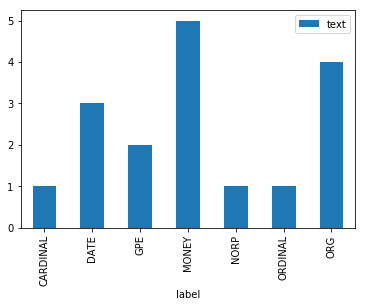

In [13]:
label_frequency.plot.bar()